In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('data')

Mounted at data


In [0]:
data_root = 'data/My Drive'
filename = os.path.join(data_root,'international-airline-passengers.csv')
dataframe = pd.read_csv(filename,usecols=[1],header=0)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [3]:
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [4]:
dataset[:5]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [0]:
def ts_train_test_split(dataset, train_size=0.9):
  train_examples = int(dataset.shape[0] * train_size)
  return dataset[:train_examples], dataset[train_examples:]

In [0]:
train,test=ts_train_test_split(dataset,train_size=0.67)

In [7]:
train.shape, test.shape

((97, 1), (48, 1))

In [0]:
def mvts_to_xy(train, test, n_x, n_y):
  
  X_train = np.zeros((train.shape[0] - n_x - n_y, n_x))
  Y_train = np.zeros((train.shape[0] - n_x - n_y, n_y))
  for i in range(0, train.shape[0] - n_x - n_y):
    X_train[i] = train[i:i+n_x].flatten()
    Y_train[i] = train[i+n_x:i+n_x+n_y].flatten()
    
  X_test = np.zeros((test.shape[0] - n_x - n_y, n_x))
  Y_test = np.zeros((test.shape[0] - n_x - n_y, n_y))
  for i in range(0, test.shape[0] - n_x - n_y):
    X_test[i] = test[i:i+n_x].flatten()
    Y_test[i] = test[i+n_x:i+n_x+n_y].flatten()
  return X_train, Y_train, X_test, Y_test

In [0]:
# reshape into X=t-1,t and Y=t+1
n_x=10
n_y=1
X_train, Y_train, X_test, Y_test = mvts_to_xy(train, test,n_x=n_x,n_y=n_y)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
num_layers = 2
num_neurons = [8,8]
n_epochs = 50
batch_size = 2

In [12]:
model = Sequential()
model.add(Dense(num_neurons[0], activation='relu',
input_shape=(n_x,)))
model.add(Dense(num_neurons[1], activation='relu'))
model.add(Dense(units=1))
model.summary()
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
86/86 [==============================] - 3s 38ms/step - loss: 57892.0428
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 22248.7620
Epoch 3/50
86/86 [==============================] - 0s 3ms/step - loss: 8778.4391
Epoch 4/50
86/86 [==============================] - 0s 3ms/step - loss: 3374.8394
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 2023.

In [13]:
import math
score = model.evaluate(X_test, Y_test)
print('\nTest mse:', score)
print('Test rmse:', math.sqrt(score))

37/37 [==============================] - 0s 816us/step

Test mse: 6500.712046030405
Test rmse: 80.62699328407581


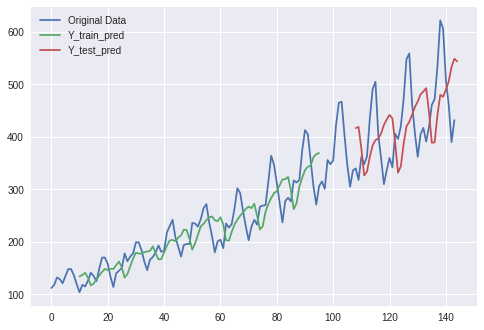

In [14]:
import matplotlib.pyplot as plt
# make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
# shift train predictions for plotting
Y_train_pred_plot = np.empty_like(dataset)
Y_train_pred_plot[:, :] = np.nan
Y_train_pred_plot[n_x:Y_train_pred.shape[0]+n_x, :] = Y_train_pred
# shift test predictions for plotting
Y_test_pred_plot = np.empty_like(dataset)
Y_test_pred_plot[:, :] = np.nan
Y_test_pred_plot[Y_train_pred.shape[0]+(2*n_x)+(2*n_y):dataset.shape[0], :] = Y_test_pred
# plot baseline and predictions
plt.plot(dataset,label='Original Data')
plt.plot(Y_train_pred_plot,label='Y_train_pred')
plt.plot(Y_test_pred_plot,label='Y_test_pred')
plt.legend()
plt.show()